In [1]:
!pip install librosa

In [ ]:
# Beat tracking example
import librosa

# 1. Get the file path to an included audio example
filename = librosa.example('nutcracker')


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
sample_rate = 16e3
n_fft = 2048
hop_length = 128
y, sr = librosa.load(filename, sr =sample_rate)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print(f'Estimated tempo: {tempo} beats per minute')

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: [110.29411765] beats per minute


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
sr

16000.0

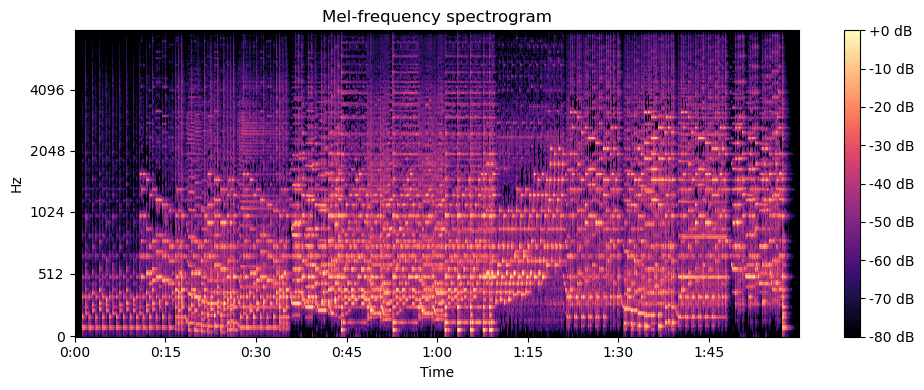

In [ ]:
# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = n_fft, hop_length=hop_length, n_mels=256, fmax=8000)

# Convert to decibels (log scale)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot it
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()